## Classification Project

### Task:
Make a prediction for a company on which customers are more likely to purchase or not purchase

### Dataset Given:
We will work with a dataset that contains details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. This dataet was obtained from kaggle and can be found in this link: https://www.kaggle.com/datasets/denisadutca/customer-behaviour

### Problem:
Companies want more customers to purchase thier prodects and learning the behavior of their customers can help increase the purchases rate.

### Objective/Solution:
Create a machine learning algorithm that will show which customers are more likely to purchase the companies products and which customers to target.

### Dataset information
- 5 attributes
- 400 instances

### IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [75]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics

In [76]:
# Force Pandas to display all rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [77]:
# Read the CSV file 
df = pd.read_csv('Customer_Behaviour.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [78]:
# Load the top 5 instances
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [79]:
# Check the shape of the dataframe
df.shape

(400, 5)

In [80]:
# Display the feature columns
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [81]:
# Obtain the summary of the dataframe data types
telecom_df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

### PERFORM DATA VISUALIZATION

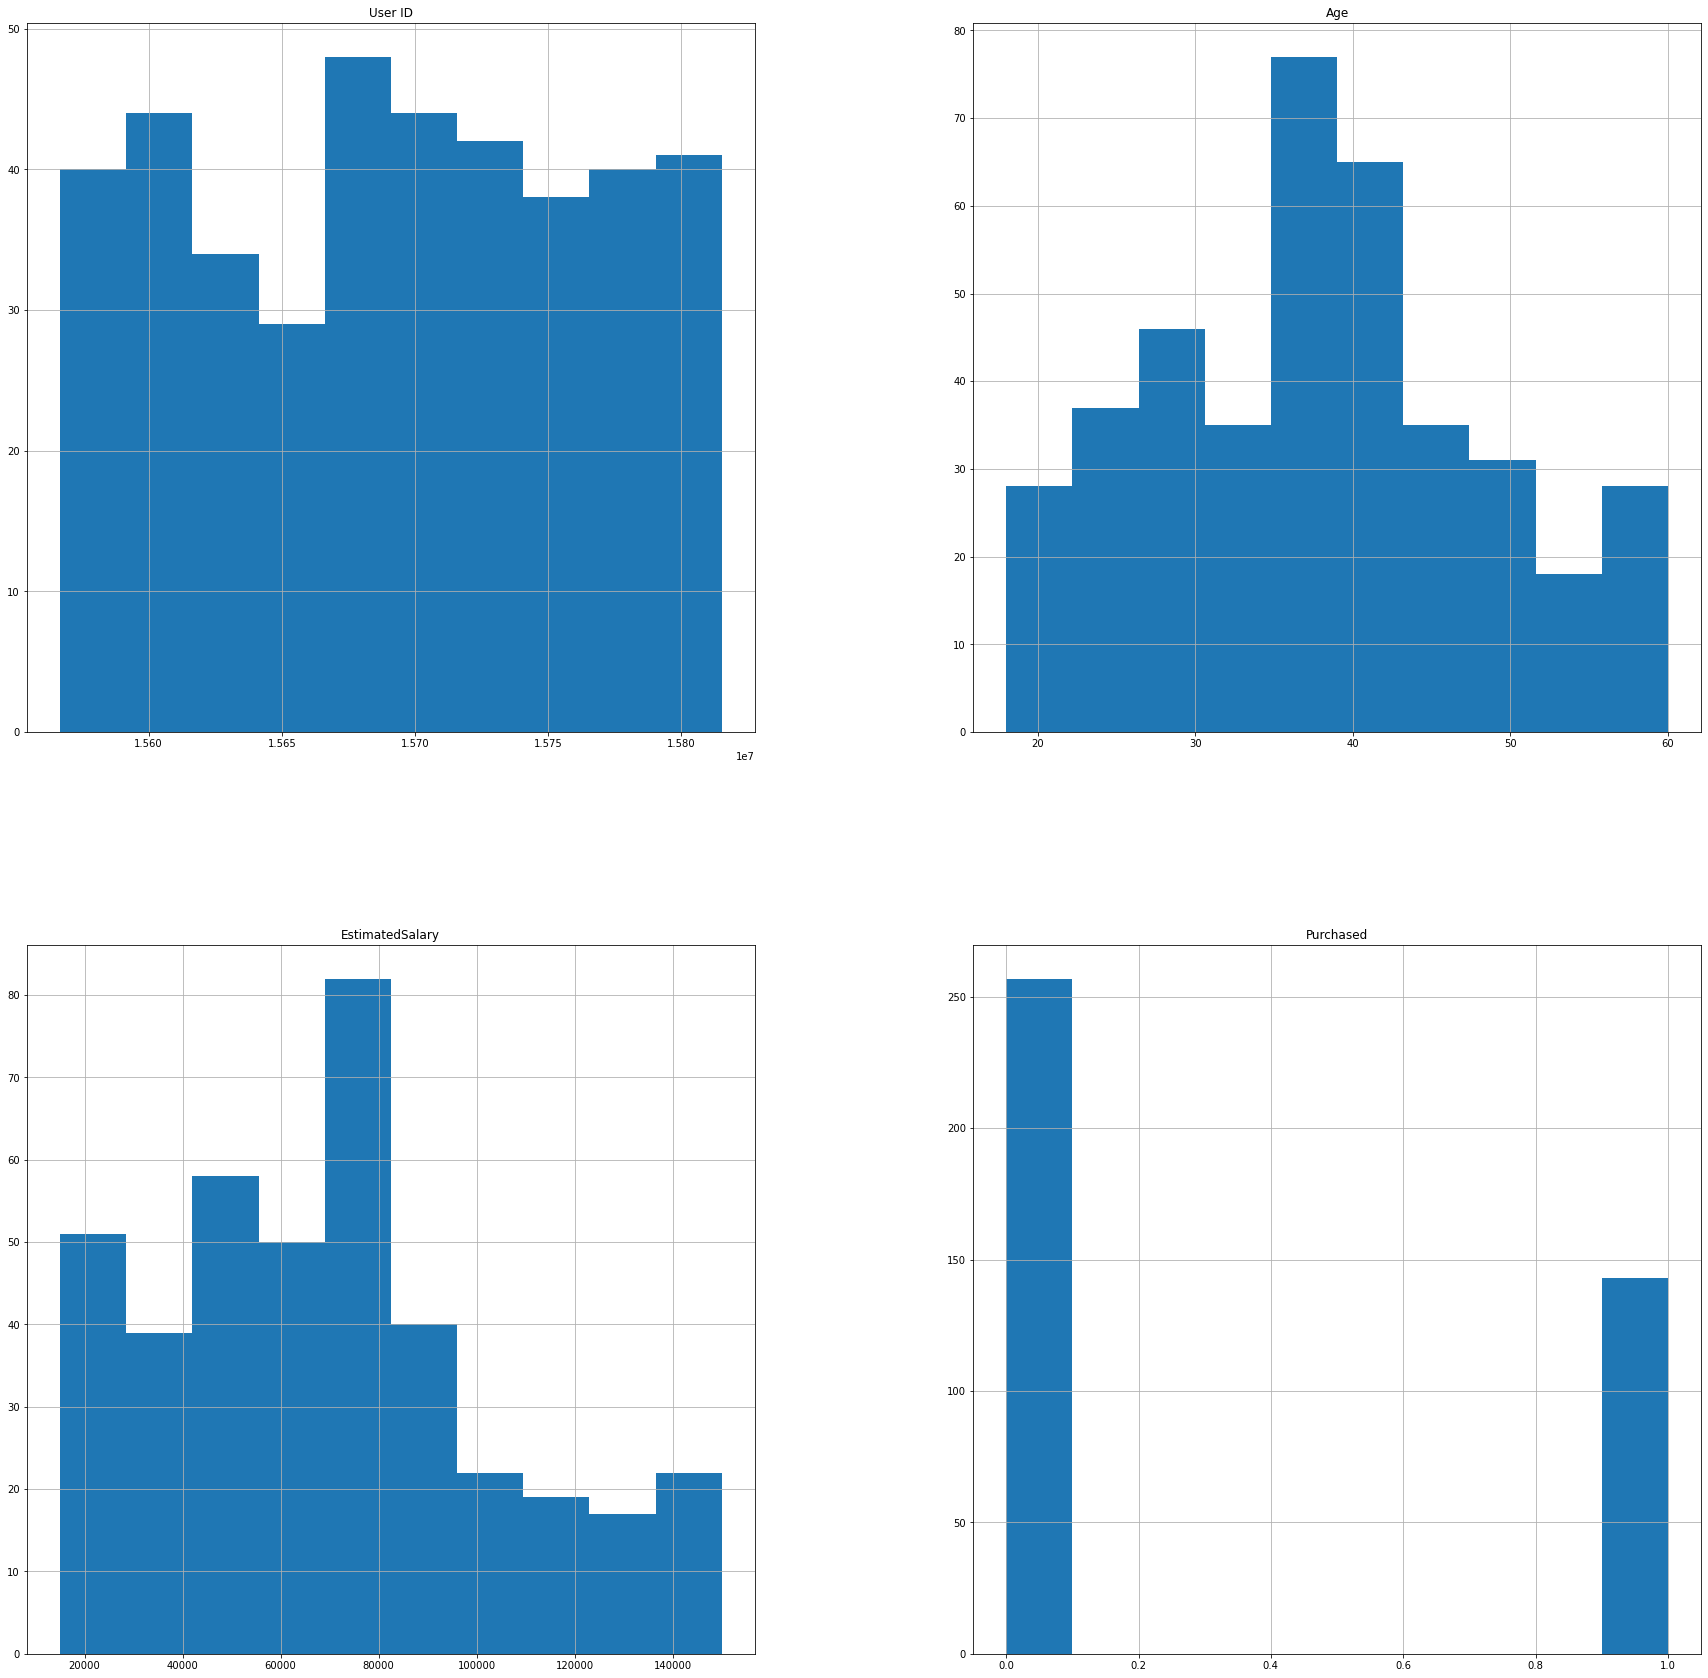

In [82]:
df.hist(figsize = (30, 30))
plt.show()

In [83]:
# See how many people purchased and did not purchase
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:ylabel='Purchased'>

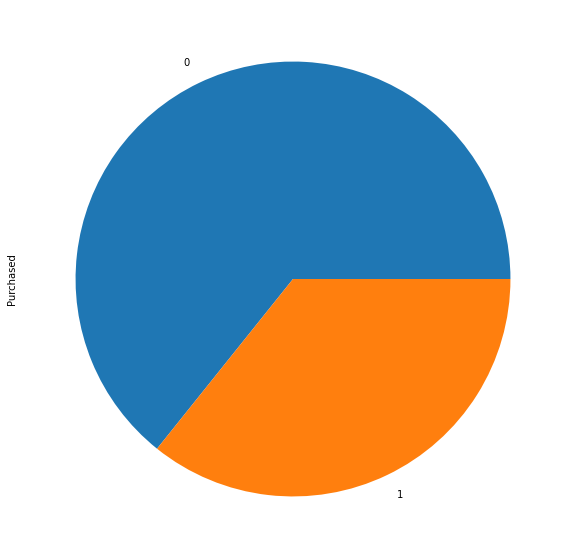

In [84]:
# Make a pie chart of the Purchased vs Not Purchased customers
plt.figure(figsize = [10, 10])
df['Purchased'].value_counts().plot(kind='pie')

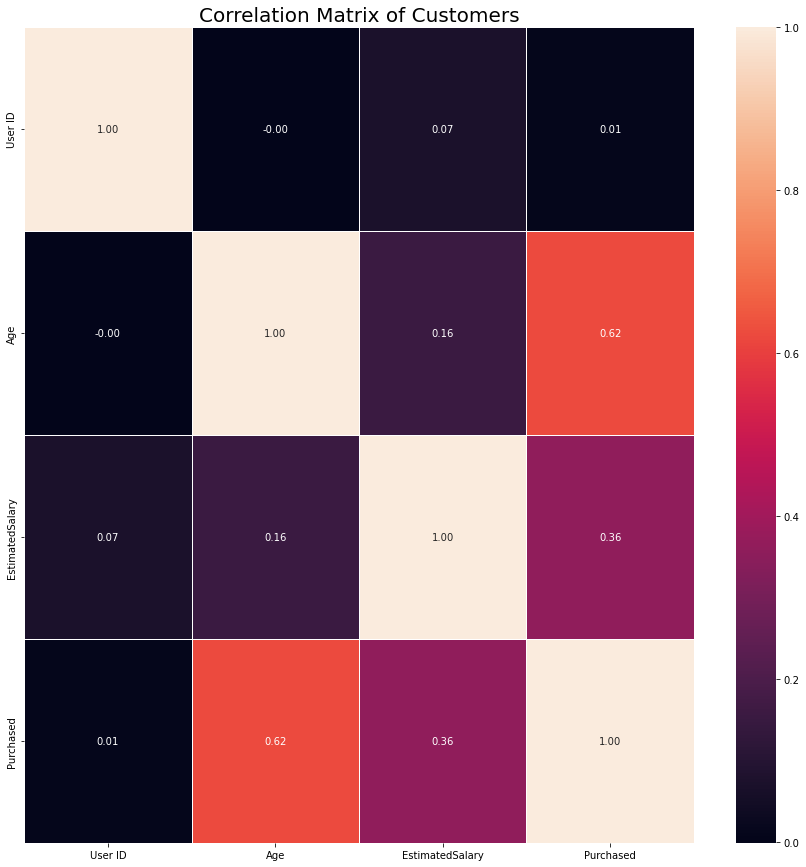

In [85]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Customers", fontsize = 20)
plt.show()

# It is clearly shown that "Age" and "Purchased" are correlated.

Text(0.5, 1.0, 'Distribution of Purchased by Age')

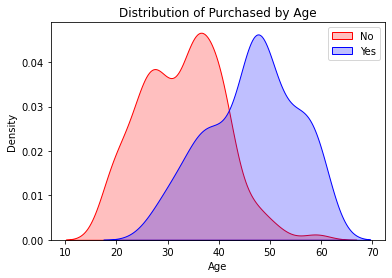

In [86]:
# Plot kde estimate to show
ax = sns.kdeplot(df.Age[(df["Purchased"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(df.Age[(df["Purchased"] == 1)],
               color = "Blue", shade = True)

ax.legend(["No", "Yes"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Age")
ax.set_title("Distribution of Purchased by Age")
# We can see that the customers that did purchase were older than the customers who did not purchase

### IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

In [87]:
# Fix the 'Gender' column in the dataframe
def gender_type (row):
   if row['Gender'] == 'Male':
      return 1
   if row['Gender'] == 'Female':
      return 2

In [88]:
# Apply the function now to make a new column that contains integer values for the different values in the 'Gender' column.
df['Gender'] = df.apply (lambda row: gender_type(row), axis=1)

In [89]:
# Check dataset's head now.
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [90]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output to y

X = df.drop(["Purchased", "User ID"], axis = "columns")
y = df["Purchased"]

In [91]:
X.shape

(400, 3)

In [92]:
y.shape

(400,)

In [93]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [94]:
X_train.shape

(280, 3)

In [95]:
X_test.shape

(120, 3)

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

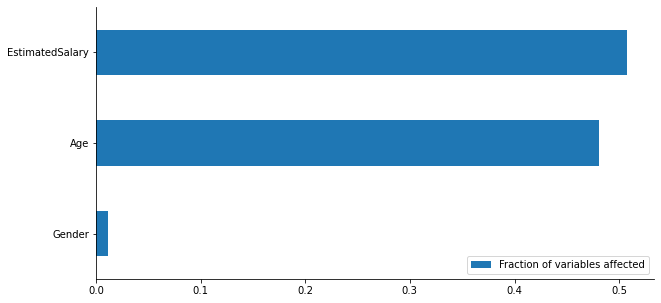

In [97]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

- The above graph is generated by Random Forest algorithm 
- The graph indicates that "EstimatedSalary" tops the list of important features followed by "Age"

### TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
        
model_LR.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_predict = model_LR.predict(X_test)

In [100]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 
# The model has an accuracy of 72% but did very poorly on test 1.

              precision    recall  f1-score   support

           0       0.72      1.00      0.83        86
           1       0.00      0.00      0.00        34

    accuracy                           0.72       120
   macro avg       0.36      0.50      0.42       120
weighted avg       0.51      0.72      0.60       120



/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

### TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [101]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc) 
model_svm.fit(X_train, y_train)

/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/parabhjotthiara/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=100000))

In [102]:
y_predict = model_svm.predict(X_test)

In [103]:
print(classification_report(y_test, y_predict))
# The model has an accuracy of 78% but did poorly on test 1 still

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        86
           1       0.80      0.35      0.49        34

    accuracy                           0.79       120
   macro avg       0.80      0.66      0.68       120
weighted avg       0.79      0.79      0.76       120



<AxesSubplot:>

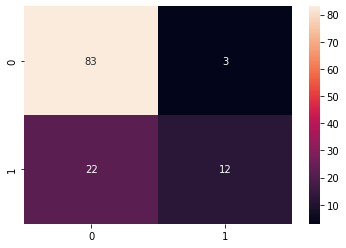

In [104]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
# The model got 94 sample right but messed up on 26 samples

### TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [105]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
y_predict = model_rf.predict(X_test)

In [107]:
print(classification_report(y_test, y_predict))
# The model has an accuracy of 93% and did well on both tests

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        86
           1       0.79      0.91      0.85        34

    accuracy                           0.91       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.92      0.91      0.91       120



<AxesSubplot:>

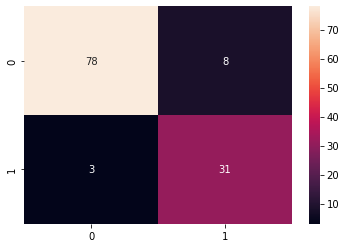

In [108]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
# The model got 112 samples right and messed up on 8 samples

### TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
y_predict = model_knn.predict(X_test) 

In [111]:
print(classification_report(y_test, y_predict))
# The model has an accuracy of 79% but did not do so great on test 1

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        86
           1       0.64      0.62      0.63        34

    accuracy                           0.79       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.79      0.79      0.79       120



<AxesSubplot:>

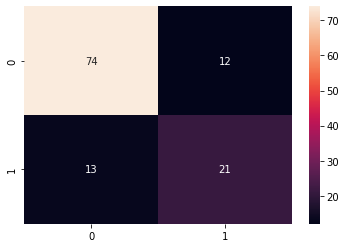

In [112]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
# The model got 95 samples right and messed up on 25 samples

### TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [115]:
y_predict = model_gnb.predict(X_test)

In [116]:
print(classification_report(y_test, y_predict))
# The model has an accuracy of 92% and did well on both tests

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        86
           1       0.82      0.91      0.86        34

    accuracy                           0.92       120
   macro avg       0.89      0.92      0.90       120
weighted avg       0.92      0.92      0.92       120



<AxesSubplot:>

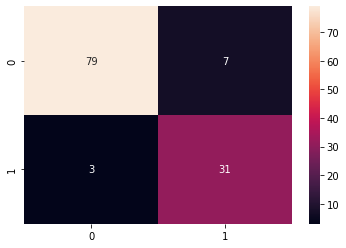

In [117]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
# The model got 110 samples right and messed up on 10 samples.

### COMPARE TRAINED CLASSIFIER MODELS AND CONCLUDING REMARKS

In [118]:
model_LR.predict_proba(X_test)
# The first element is the probability that the output will be 0 
# The second element is the probabiliy that the output will be 1

array([[0.50462829, 0.49537171],
       [0.51628627, 0.48371373],
       [0.50666454, 0.49333546],
       [0.50925579, 0.49074421],
       [0.5148066 , 0.4851934 ],
       [0.52386448, 0.47613552],
       [0.51628626, 0.48371374],
       [0.51055123, 0.48944877],
       [0.51517654, 0.48482346],
       [0.51388168, 0.48611832],
       [0.51665613, 0.48334387],
       [0.50777513, 0.49222487],
       [0.52312556, 0.47687444],
       [0.51332668, 0.48667332],
       [0.51092133, 0.48907867],
       [0.52183222, 0.47816778],
       [0.51203157, 0.48796843],
       [0.50999606, 0.49000394],
       [0.50925578, 0.49074422],
       [0.5164712 , 0.4835288 ],
       [0.51499157, 0.48500843],
       [0.51536152, 0.48463848],
       [0.51018111, 0.48981889],
       [0.50277703, 0.49722297],
       [0.50888562, 0.49111438],
       [0.51332668, 0.48667332],
       [0.5136967 , 0.4863033 ],
       [0.51055123, 0.48944877],
       [0.51462163, 0.48537837],
       [0.50629433, 0.49370567],
       [0.

In [119]:
model_LR.predict_proba(X_test)[:, 1]

array([0.49537171, 0.48371373, 0.49333546, 0.49074421, 0.4851934 ,
       0.47613552, 0.48371374, 0.48944877, 0.48482346, 0.48611832,
       0.48334387, 0.49222487, 0.47687444, 0.48667332, 0.48907867,
       0.47816778, 0.48796843, 0.49000394, 0.49074422, 0.4835288 ,
       0.48500843, 0.48463848, 0.48981889, 0.49722297, 0.49111438,
       0.48667332, 0.4863033 , 0.48944877, 0.48537837, 0.49370567,
       0.49666758, 0.48907867, 0.49222488, 0.48408364, 0.49037408,
       0.48334387, 0.49463122, 0.48482345, 0.4846385 , 0.48685832,
       0.48796844, 0.49278016, 0.47336557, 0.49352056, 0.49481635,
       0.4918547 , 0.48371373, 0.47391943, 0.49407589, 0.48371375,
       0.4940759 , 0.4851934 , 0.48648831, 0.49074422, 0.4940759 ,
       0.48926373, 0.49574195, 0.48685832, 0.49129945, 0.48001589,
       0.49389078, 0.49240997, 0.47539671, 0.48574834, 0.49240997,
       0.48889362, 0.49203979, 0.48611832, 0.47281177, 0.49129944,
       0.48796844, 0.48685832, 0.48889361, 0.48852354, 0.48870

In [120]:
y_test

144    0
280    1
399    1
362    1
198    0
360    1
83     0
236    0
136    0
327    0
161    0
272    1
308    1
121    0
101    0
172    0
216    0
305    0
89     0
291    1
90     0
371    1
86     0
155    0
56     0
174    0
275    1
115    0
298    0
355    1
74     0
241    0
231    0
12     0
251    0
34     0
365    1
238    0
94     0
111    0
333    0
292    1
222    1
389    1
36     0
33     0
367    1
284    0
375    1
170    0
127    0
114    0
98     0
246    0
189    0
65     0
53     0
387    0
176    0
215    1
398    0
395    1
227    1
260    0
187    0
325    0
192    0
116    0
230    1
205    0
342    0
181    0
385    1
84     0
281    0
61     0
139    0
243    1
397    1
177    0
157    0
60     0
141    0
199    0
344    1
165    0
41     0
255    1
42     0
79     0
106    0
50     0
11     0
120    0
62     0
331    1
242    1
179    0
212    0
259    1
185    0
2      0
258    1
78     0
37     0
384    1
109    0
369    1
244    0
47     0
396    1
3

In [121]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [122]:
fpr1

array([0.        , 0.01162791, 0.04651163, 0.04651163, 0.08139535,
       0.08139535, 0.10465116, 0.10465116, 0.11627907, 0.11627907,
       0.15116279, 0.15116279, 0.1627907 , 0.1627907 , 0.1744186 ,
       0.1744186 , 0.18604651, 0.18604651, 0.19767442, 0.19767442,
       0.22093023, 0.22093023, 0.3372093 , 0.3372093 , 0.41860465,
       0.44186047, 0.51162791, 0.51162791, 0.70930233, 0.70930233,
       0.87209302, 0.87209302, 0.94186047, 0.94186047, 0.96511628,
       0.96511628, 0.97674419, 0.97674419, 0.98837209, 0.98837209,
       1.        , 1.        ])

In [123]:
tpr1

array([0.        , 0.        , 0.        , 0.02941176, 0.02941176,
       0.05882353, 0.05882353, 0.08823529, 0.08823529, 0.11764706,
       0.11764706, 0.17647059, 0.17647059, 0.20588235, 0.20588235,
       0.23529412, 0.23529412, 0.32352941, 0.32352941, 0.35294118,
       0.35294118, 0.38235294, 0.38235294, 0.41176471, 0.41176471,
       0.41176471, 0.41176471, 0.44117647, 0.44117647, 0.47058824,
       0.47058824, 0.5       , 0.5       , 0.61764706, 0.61764706,
       0.73529412, 0.73529412, 0.76470588, 0.76470588, 0.94117647,
       0.94117647, 1.        ])

In [124]:
thresh1

array([1.49722297, 0.49722297, 0.49629733, 0.49629732, 0.49574195,
       0.49574194, 0.49537171, 0.49518658, 0.49481635, 0.49463122,
       0.4940759 , 0.49407589, 0.49389078, 0.49389078, 0.49370568,
       0.49370567, 0.49352057, 0.49278016, 0.49240997, 0.49240997,
       0.49222487, 0.49222487, 0.49074422, 0.49074421, 0.48981889,
       0.48944877, 0.48889362, 0.48889361, 0.48630332, 0.4863033 ,
       0.4846385 , 0.48463848, 0.48371374, 0.4835288 , 0.48334387,
       0.48057044, 0.4800159 , 0.48001589, 0.47816778, 0.47447336,
       0.47391943, 0.47281177])

In [125]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)

In [126]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.38440492476060195
Support Vector Machine:  0.6155950752393982
Random Forest:  0.9669972640218878
K-Nearest Neighbors:  0.8662790697674418
Naive Bayes:  0.9746922024623803


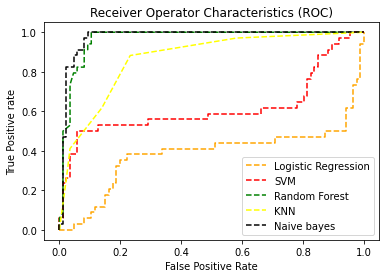

In [127]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Naive Bayes algorithm produced the best AUC. Therefore, it is clear that Naive Bayes model did a better job of classifying the purchased/not purchased customers.

In [129]:
y_predict = model_gnb.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        86
           1       0.82      0.91      0.86        34

    accuracy                           0.92       120
   macro avg       0.89      0.92      0.90       120
weighted avg       0.92      0.92      0.92       120



Amongst all the trained models, Naive Bayes algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Naive Bayes model

- Accuracy: ~92% label accuracy
- Precision: ~96% labeled as customers who did not purchase and ~82% labeled as customers who did purchase
- Recall: ~92% labeled as customers who did not purchase and ~91% labeled as customers who did purchase